In [1]:
import pandas as pd
import os

## Important: Basically I made a sheet that looks like this: 

## https://i.imgur.com/1QyqVlc.png

## Load it with your file directory
papers = pd.read_csv('C:/Users/Sid/Desktop/Full CSV.csv')

In [2]:
papers.head()

,text
0,hello everyone thank attending talk building ...
1,thank everyone stock like states topic today ...
2,guys made huge mistake went dark web dark web...
3,music welcome live america podcast comedy cel...
4,seen really last year cyber criminals used pa...


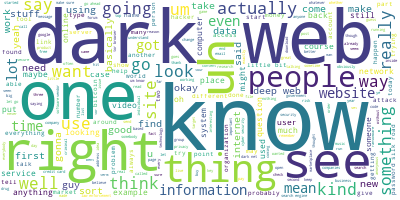

In [3]:
## run pip install WordCloud if you have not had this installed already! ##

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [4]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

C:\Users\Sid\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['hello', 'everyone', 'thank', 'attending', 'talk', 'building', 'peer', 'peer', 'darknets', 'lessons', 'learned', 'personal', 'note', 'happy', 'today', 'two', 'years', 'ago', 'certain', 'misfortune', 'tearing', 'muscle', 'thigh', 'would', 'really', 'like', 'thank', 'pharmaceutical', 'industry', 'presence']


In [5]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 27), (6, 1), (7, 3), (8, 2), (9, 1), (10, 4), (11, 1), (12, 9), (13, 1), (14, 1), (15, 1), (16, 2), (17, 15), (18, 1), (19, 4), (20, 1), (21, 1), (22, 1), (23, 2), (24, 13), (25, 2), (26, 8), (27, 1), (28, 1), (29, 1)]


In [6]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.014*"web" + 0.012*"know" + 0.011*"dark" + 0.011*"like" + 0.008*"one" + '
  '0.007*"get" + 0.006*"see" + 0.006*"people" + 0.006*"go" + 0.006*"going"'),
 (1,
  '0.016*"know" + 0.013*"like" + 0.010*"web" + 0.009*"go" + 0.008*"get" + '
  '0.007*"one" + 0.007*"right" + 0.007*"see" + 0.006*"going" + 0.006*"dark"'),
 (2,
  '0.017*"know" + 0.015*"web" + 0.012*"like" + 0.010*"dark" + 0.008*"one" + '
  '0.008*"people" + 0.007*"right" + 0.007*"go" + 0.007*"uh" + 0.007*"going"'),
 (3,
  '0.015*"know" + 0.012*"like" + 0.010*"one" + 0.007*"get" + 0.007*"web" + '
  '0.007*"dark" + 0.006*"going" + 0.006*"go" + 0.006*"right" + 0.005*"people"'),
 (4,
  '0.014*"like" + 0.010*"know" + 0.009*"web" + 0.007*"uh" + 0.007*"right" + '
  '0.007*"go" + 0.007*"get" + 0.007*"want" + 0.007*"going" + 0.006*"one"'),
 (5,
  '0.016*"know" + 0.015*"like" + 0.009*"one" + 0.007*"see" + 0.007*"dark" + '
  '0.007*"right" + 0.007*"web" + 0.006*"go" + 0.006*"really" + 0.006*"think"'),
 (6,
  '0.015*"know" + 0.014*"li

In [7]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

C:\Users\Sid\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
C:\Users\Sid\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [8]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.005662  0.000353       1        1  34.018654
0      0.004356 -0.000089       2        1  12.735365
6     -0.002399 -0.004948       3        1  12.350287
1     -0.002549  0.004433       4        1   8.967286
3     -0.003757  0.000382       5        1   8.135420
5     -0.004839 -0.000431       6        1   7.666038
9      0.004143 -0.001499       7        1   6.986539
4     -0.001597  0.002586       8        1   3.863604
8     -0.000662 -0.003821       9        1   3.344827
7      0.001643  0.003036      10        1   1.931979, topic_info=          Term          Freq         Total Category  logprob  loglift
344       like  10865.000000  10865.000000  Default  30.0000  30.0000
323       know  13106.000000  13106.000000  Default  29.0000  29.0000
1454       web  10236.000000  10236.000000  Default  28.0000  28.0000
438        one   7121.000000   7121.000000  Default  27.0000  27.0000
255        get   5432.000000   5432.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
5     actually     70.840613   4587.973760  Topic10  -5.4930  -0.2241
356        lot     58.622930   3379.515456  Topic10  -5.6823  -0.1077
662     things     59.871558   3618.231931  Topic10  -5.6613  -0.1549
1735        uh     61.949101   5021.602028  Topic10  -5.6272  -0.4486
716       well     56.287979   3296.535261  Topic10  -5.7230  -0.1235

[817 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
746        1  0.499947  accessible
746        2  0.121040  accessible
746        3  0.094727  accessible
746        4  0.063151  accessible
746        5  0.042101  accessible
...      ...       ...         ...
1474      10  0.019940        yeah
27545      3  0.288523        yolk
27545      4  0.288523        yolk
27545      5  0.288523        yolk
27344      6  0.387892      ziploc

[2192 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 7, 2, 4, 6, 10, 5, 9, 8])